<a href="https://colab.research.google.com/github/Pellizzari/Tarea0-INF393-II-2019/blob/master/Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>

<H5 align='center'>Giorgio Pellizzari Águila <br> Cristian Vallejos Pérez</H5> </H4>


<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

**Resolución:**

La función implementada a continuación permite predecir un valor de salida $0\;ó\;1$, a partir de un patrón de entrada $x$ y los correspondientes pesos $w$ de modelo. Desde este punto, se ha decidido incluir los bias dentro del vector $\vec{w}$, por lo que la entrada $x$ debe incluir un vector columna $\vec{1}$ al final.

In [0]:
import numpy as np

def predict(inputs):
  comb = np.dot(inputs, weights)
  if comb > 0:
    prediction = 1
  else:
    prediction = 0
  return prediction

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

**Resolución:**

La siguiente clase (*Perceptron*) implementa el algoritmo del Perceptrón, utilizando la función predictora implementada en la parte *a)*. Asimismo, se incluye una función de entrenamiento que utiliza dicha función predictora para actualizar el vector $\vec{w}$ a partir de cada instancia del dataset que se entregue al Perceptrón para su entrenamiento.

Por último, la clase *Perceptron* incluye un atributo *iterations* para permitir que el Perceptrón aprenda tras $T$ repeticiones de su algoritmo; y un atributo *learning_rate*, el cual permitirá amortiguar las modificaciones a los distintos valores del vector $\vec{w}$, siempre y cuando el valor predicho en la i-ésima iteración difiera del valor esperado.

In [0]:
class Perceptron(object):
    # Constructor del Perceptrón. 
    #   Recibe como parámetro la cantidad de columnas "no_of_inputs" del dataset de entrenamiento.
    def __init__(self, no_of_inputs, iterations=1, learning_rate=0.01,acctest=[]):
      self.iterations = iterations
      self.learning_rate = learning_rate
      self.weights = np.zeros(no_of_inputs)
      self.acctest= list()
           
    # Función de predicción. 
    #   Recibe como parámetro un vector fila del dataset y un índice i.
    #   Retorna el valor de salida 0 ó 1, tras verificar el resultado del producto punto.
    def predict(self, inputs, i):
      comb = np.dot(inputs, self.weights)
      if comb > 0:
        return 1
      else:
        return 0
           
    # Función de entrenamiento. 
    #   Recibe como parámetro la data de entrenamiento y los resultados esperados para cada instancia del conjunto juntos con los mismos datos pero para testing.
    #   No tiene retorno. Su implementación es utilizada para actualizar el vector de pesos tras cada instancia.
    #   Asimismo, se calcula el accuracy del modelo tras cada una de éstas sobre los datos de testing y se registra en una lista.
    def train(self, training_inputs, labels,testing_inputs, testing_outputs):
      for _ in range(self.iterations):
        for inputs, label in zip(training_inputs, labels):
          prediction = self.predict(inputs, i)
          self.weights += self.learning_rate * (label - prediction) * inputs
          outtest=list()
          for inp, lab in zip(testing_inputs,testing_outputs):
            outtest.append(self.predict(inp,i))
          self.acctest.append(accuracy_score(testing_outputs,outtest, normalize=True))


> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo:</div>

**Resolución:**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Se carga el dataset y se separa en input y output
dataset = load_breast_cancer()
X = dataset.data; y = dataset.target

# Se fragmenta la data en dos conjuntos: 1) entrenamiento y 2) pruebas.
# Estos, a su vez, se separan en data entrante y data resultante.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123456)

# Se traduce el conjunto de entrenamiento resultante en una lista.
y_trained = []
for i in y_train:
  y_trained.append(i)

# Se traduce el conjunto de test resultante en una lista.

y_tested = []
for j in y_test:
  y_tested.append(j)

# Se normalizan los datos del conjunto de entrenamiento y test entrante, agregando,
# además, una columna de 1s que permita incluir el bias dentro del vector de pesos.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(len(X_train))]

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)
X_test = np.c_[X_test, np.ones(len(X_test))]

Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

**Resolución:**

In [0]:
# Se entrena el Perceptrón y se calcula el tiempo de ejecución
from time import time
p = Perceptron(len(X_train[0]))
start_time=time()
p.train(X_train, y_trained, X_test, y_tested)
elapsed_time=time()-start_time
print("Tiempo de ejecución: %10f segundos" %elapsed_time)


Tiempo de ejecución:   0.165255 segundos


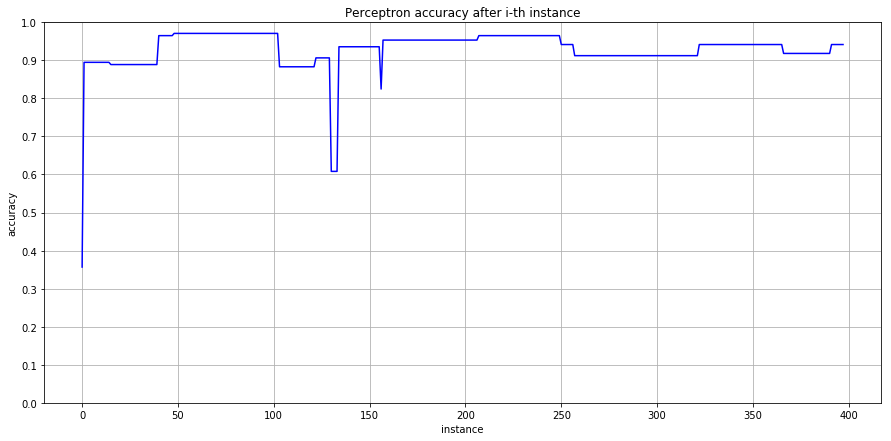

In [0]:
import matplotlib.pyplot as plt

# Se grafica el accuracy del modelo tras cada instancia del conjunto de datos de entrenamiento respecto a los datos de testing.
x = [x for x in range(len(p.acctest))]

plt.figure(figsize=(15, 7)); plt.ylim(0, 1)
plt.plot(x, p.acctest, color='b')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('instance'); plt.ylabel('accuracy')
plt.title('Perceptron accuracy after i-th instance')
plt.grid(True)

plt.show()

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

**Resolución:**

In [0]:
class Forgetron(object):
    
    # Constructor del Forgetron. 
    #   Recibe como parámetro la cantidad de columnas "no_of_inputs" del dataset de entrenamiento.
    
    def __init__(self, no_of_inputs, iterations=1, learning_rate=0.5, acctest=[]):
      self.iterations = iterations
      self.learning_rate = learning_rate
      self.weights = np.zeros(no_of_inputs)
      self.acctest=list()
      
    # Función de predicción. 
    #   Recibe como parámetro el dataset(inputs) y el vector de soluciones(labels).
    #   Retorna el valor de salida 0 ó 1.
    #   Recibe I como lista de las posiciones de las ultimas K veces que el algoritmo erró.
    #   Además, registra dicho valor de salida en una lista de outputs.
    
    def predict(self, inputs, i, I, labels):
        comb=0
        for k in I:   
            comb += labels[k] * np.dot(inputs[i], inputs[k])
        if comb >= 0:
            return 1
        else:
            return 0
          
    # Función de predicción de los datos según los pesos finales.
    def predict2(self, inputs, i):
        comb = np.dot(inputs, self.weights)
        if comb > 0:
            return 1
        else:
            return 0
            
    # Función de entrenamiento. 
    #   Recibe como parámetro la data de entrenamiento y los resultados esperados para cada instancia del conjunto juntos con los mismos datos pero para testing.
    #   Recibe K como el tamaño de la memoria, determina cuantos datos se recordarán al momento de equivocarse.
    #   No tiene retorno. Su implementación es utilizada para actualizar el vector de pesos tras cada instancia
    #   Asimismo, se calcula el accuracy del modelo tras cada una de éstas respecto a los datos de testing y se registra en una lista.
    
    def train(self, training_inputs, labels,K,testing_inputs, testing_outputs):
        I=[]
        n=0
        for i in range(self.iterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(training_inputs, n,I,labels)
                if label!=prediction:
                    if len(I)>K:
                        I.pop(0)
                    I.append(n)
                self.weights += self.learning_rate * (label - prediction) * inputs
                outtest=list()
                for inp, lab in zip(testing_inputs,testing_outputs):
                  outtest.append(self.predict2(inp,i))
                self.acctest.append(accuracy_score(testing_outputs,outtest, normalize=True))
                n=n+1
                

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

**Resolución:**

In [0]:
#Se entrena el Forgetron y se calcula el tiempo de ejecución
f = Forgetron(len(X_train[0]))
start_time=time()
f.train(X_train, y_trained,10, X_test, y_tested)
elapsed_time=time()-start_time
print("Tiempo de ejecución: %10f segundos" %elapsed_time)


Tiempo de ejecución:   0.177705 segundos


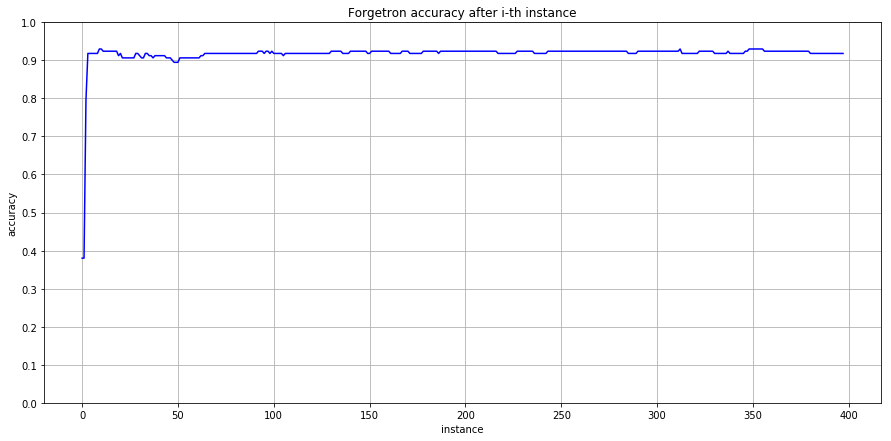

In [0]:
#Se grafica la accuracy obtenida despues de cada cambio en los pesos.

x = [x for x in range(len(f.acctest))]

plt.figure(figsize=(15, 7))

plt.ylim(0, 1)
plt.plot(x, f.acctest, color='b')
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel('instance')
plt.ylabel('accuracy')
plt.title('Forgetron accuracy after i-th instance')
plt.grid(True)

plt.show()

Se logra observar que tanto el perceptron como el forgetron logran similares aprendizajes basandose en distintos metodos para obtenerlos. Esto se puede concluir gracias a que ambas gráficas de accuracy frente a cada instancia poseen comportamientos similares estabilizandose en una accuracy por sobre el 90%. Cabe destacar que para esta semilla el perceptron obtuvo una mejor accuracy y un menor tiempo de ejecución que el forgetron, pero este ultimo se comporto de forma mucho mas estable.



### ¿Qué sucede al variar la función objetivo del problema? 

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

**Resolución:**

Debido al overflow causado cuando $\xi \notin\,[709, 35.9]\,$, se ha tomado la determinación de acotar la función sigmoidal de la siguiente manera:

\\
$$
  \sigma(\xi) = 
     \begin{cases}
       \frac{1}{1+e^{-709}} & :\quad\text{if}\;\xi \le -710\\
       \frac{1}{1+e^{-\xi}} & :\quad\text{if}\;-710 \gt \xi \lt 36\\
       \frac{1}{1+e^{-35.9}} & :\quad\text{if}\;\xi \gt 36\\
     \end{cases}
$$

In [0]:
# Función sigmoidal, acotada en -709 <= x_i <= 709.
def sigmoid(xi):
  if xi <= -710:
    xi = -709
  elif xi >= 36:
    xi = 35.9
  return 1/(1+np.exp(-xi))

# Nueva función de predicción, la cual incluye la sigmoidal anterior.
def predict(inputs):
  return sigmoid(np.dot(inputs, weights))

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow -\infty$)*.

**Resolución:**

Debido a la cota aplicada sobre la función sigmoidal, los límites del logaritmo no son un problema para la función de pérdida.

In [0]:
# Función de pérdida (loss).
def loss(y_value, sigmoid_value):
  return -y_value*np.log(sigmoid_value) - (1-y_value)*np.log(1-sigmoid_value)

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

**Resolución:**

En primera instancia, reescribiremos la función de predicción como $g(x; w) = \sigma(w^T \cdot x)$ con $\sigma'(w^T \cdot x) = \sigma(w^T \cdot x) (1-\sigma(w^T \cdot x)) \cdot x$ por regla de la cadena, de modo que la función de pérdida $\ell$ podría ser expresada como:

\\
$$
\ell (y, \ g(x; w)) = - y \cdot \ln{(\sigma(w^T \cdot x))} - (1-y) \cdot \ln{(1-\sigma(w^T \cdot x))}
$$

\\
La cual es una función continua y derivable en $\xi$, debido a que $g(\xi)$ también lo es. Luego

\\
$$
\frac{\partial \ell}{\partial w^T} = -y \cdot \frac{\sigma'(w^T \cdot x)}{\sigma(w^T \cdot x)} + (1-y) \cdot \frac{\sigma'(w^T \cdot x)}{1-\sigma(w^T \cdot x)}
$$

\\
$$
\frac{\partial \ell}{\partial w^T} = \sigma'(w^T \cdot x) \cdot (\frac{-y}{\sigma(w^T \cdot x)} +  \frac{1-y}{1-\sigma(w^T \cdot x)})
$$

\\
$$
\frac{\partial \ell}{\partial w^T} = \sigma'(w^T \cdot x) \cdot \bigg( \frac{-y \cdot (1-\sigma(w^T \cdot x)) + (1-y) \cdot \sigma(w^T \cdot x)}{\sigma(w^T \cdot x) (1-\sigma(w^T \cdot x))} \bigg)
$$

\\
$$
\frac{\partial \ell}{\partial w^T} = x \cdot [\sigma(w^T \cdot x) (1-\sigma(w^T \cdot x))] \cdot \bigg( \frac{-y \cdot (1-\sigma(w^T \cdot x)) + (1-y) \cdot \sigma(w^T \cdot x)}{\sigma(w^T \cdot x) (1-\sigma(w^T \cdot x))} \bigg)
$$

\\
$$
\frac{\partial \ell}{\partial w^T} = x \cdot [-y \cdot (1-\sigma(w^T \cdot x)) + (1-y) \cdot \sigma(w^T \cdot x)]
$$

\\
Finalmente, al despejar, el gradiente de la función de pérdida $\nabla_{\vec{w}^{(t)}} \ell $ resultante es el siguiente:

\\
$$
\frac{\partial \ell}{\partial w^T} =  \nabla_{\vec{w}^{(t)}} \ell = x \cdot (\sigma(w^T \cdot x) - y)
$$

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

**Resolución:**

In [0]:
# Gradiente de la loss.
def loss_gradient(x_inputs, y_value, sigmoid):
  return x_inputs*(sigmoid - y_value)

In [0]:
class Perceptron_SGD(object):
    # Constructor del Perceptrón. 
    #   Recibe como parámetro la cantidad de columnas "no_of_inputs" del dataset de entrenamiento.
    def __init__(self, no_of_inputs, iterations=1, learning_rate=0.001, acctest=[]):
      self.iterations = iterations
      self.learning_rate = learning_rate
      self.weights = np.zeros(no_of_inputs)
      self.loss_list = list()
      self.acctest=list()
           
    # Función de predicción. 
    #   Recibe como parámetro un vector fila del dataset y un índice i.
    #   Retorna el valor de salida 0 ó 1, tras verificar el resultado del producto punto.
    #   Además, registra dicho valor de salida en una lista de outputs.
    def predict(self, inputs):
      return sigmoid(np.dot(inputs, self.weights))
              
    # Función de entrenamiento. 
    #   Recibe como parámetro la data de entrenamiento y los resultados esperados para cada instancia del conjunto juntos con los mismos datos pero para testing.
    #   No tiene retorno. Su implementación es utilizada para actualizar el vector de pesos tras cada instancia.
    #   i del dataset. Asimismo, se calcula el accuracy del modelo sobre los datos de testing tras cada una de éstas y se registra en una lista.
    #   Se registra en una lista la loss de las predicción en cada comparación.
    def train(self, training_inputs, labels,testing_inputs,testing_outputs):
      for _ in range(self.iterations):
        for inputs, label in zip(training_inputs, labels):
          prediction = self.predict(inputs)
          self.weights = self.weights - self.learning_rate * loss_gradient(inputs, label, prediction)
          outtest=list()
          for inp, lab in zip(testing_inputs,testing_outputs):
            pred=self.predict(inp)
            if pred>0.5:
              outtest.append(1)
            else:
              outtest.append(0)
          self.acctest.append(accuracy_score(testing_outputs,outtest, normalize=True))
          self.loss_list.append(loss(label, prediction))

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

**Resolución:**

In [0]:
# Se entrena el Perceptrón SGD y se calcula el tiempo de ejecución.
p_sgd = Perceptron_SGD(len(X_train_sgd[0]))
start_time=time()
p_sgd.train(X_train, y_trained, X_test, y_tested)
elapsed_time=time()-start_time
print("Tiempo de ejecución: %10f segundos" %elapsed_time)

Tiempo de ejecución:   0.323361 segundos


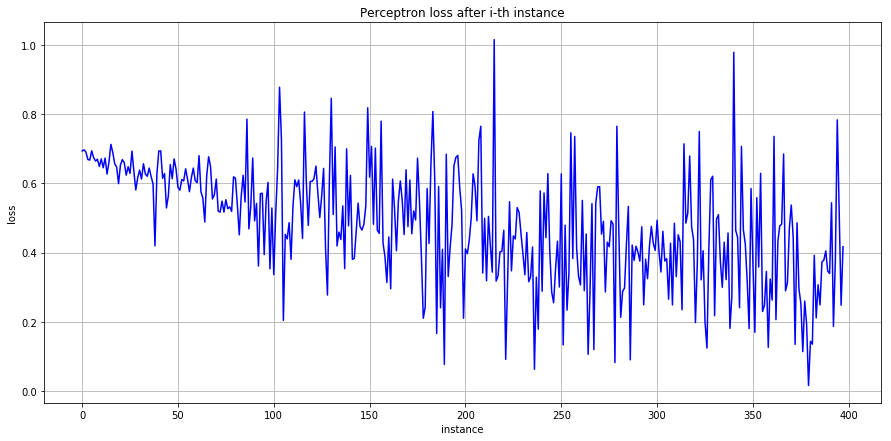

In [0]:
# Se grafica la loss del modelo tras cada instancia del conjunto de datos de entrenamiento
x = [x for x in range(len(p_sgd.loss_list))]

plt.figure(figsize=(15, 7))
plt.plot(x, p_sgd.loss_list, color='b')
plt.xlabel('instance'); plt.ylabel('loss')
plt.title('Perceptron loss after i-th instance')
plt.grid(True)

plt.show()

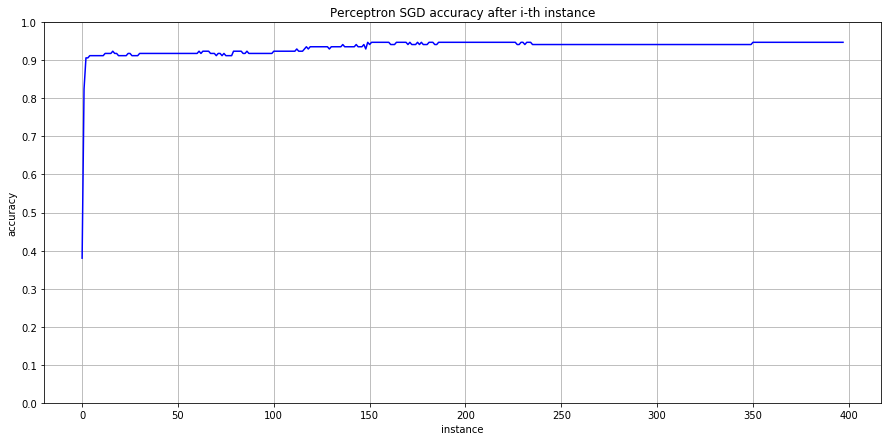

In [0]:
#Se grafica la accuracy obtenida despues de cada cambio en los pesos.

x = [x for x in range(len(p_sgd.acctest))]

plt.figure(figsize=(15, 7))

plt.ylim(0, 1)
plt.plot(x, p_sgd.acctest, color='b')
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel('instance')
plt.ylabel('accuracy')
plt.title('Perceptron SGD accuracy after i-th instance')
plt.grid(True)

plt.show()

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  